In [1]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import gzip
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)


---------------------------------------------------------------------------------------------------------------------------------------

Question - 1

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
def compute_accuracy(y_true, y_pred):
    correct_classif = 0
    total = len(y_true)
    for i in range(total):
        if(y_true[i] == y_pred[i]):
            correct_classif += 1
    return correct_classif / total

In [4]:
def perform_q1():

    #dataset reading code is used as taught in the tutorial
    metadata = unpickle("./data/cifar-10-python/cifar-10-batches-py/batches.meta")
    train_batch_1 = unpickle("./data/cifar-10-python/cifar-10-batches-py/data_batch_1")
    train_batch_2 = unpickle("./data/cifar-10-python/cifar-10-batches-py/data_batch_2")
    train_batch_3 = unpickle("./data/cifar-10-python/cifar-10-batches-py/data_batch_3")
    train_batch_4 = unpickle("./data/cifar-10-python/cifar-10-batches-py/data_batch_4")
    train_batch_5 = unpickle("./data/cifar-10-python/cifar-10-batches-py/data_batch_5")
    test_batch = unpickle("./data/cifar-10-python/cifar-10-batches-py/test_batch")
    train_x = []
    train_x.extend(train_batch_1[b'data'])
    train_x.extend(train_batch_2[b'data'])
    train_x.extend(train_batch_3[b'data'])
    train_x.extend(train_batch_4[b'data'])
    train_x.extend(train_batch_5[b'data'])
    train_x = np.array(train_x)
    train_x = train_x.reshape((train_x.shape[0],3,32,32))
    train_y = []
    train_y.extend(train_batch_1[b'labels'])
    train_y.extend(train_batch_2[b'labels'])
    train_y.extend(train_batch_3[b'labels'])
    train_y.extend(train_batch_4[b'labels'])
    train_y.extend(train_batch_5[b'labels'])
    train_y = np.array(train_y)
    test_x = test_batch[b'data']
    test_y = test_batch[b'labels']
    test_x = test_x.reshape((test_x.shape[0],3,32,32))
    test_y = np.array(test_y)
    labels_to_name = {index : str(label,'utf-8') for index,label in enumerate(metadata[b'label_names'])}

    #visualizing the data
    fig = plt.figure(figsize=(30,30))
    img_num = 1
    for label in labels_to_name.keys():
        idxs = np.where(train_y == label)[0][:5]
        # print(f"---------- 5 images for {labels_to_name[label]} [Class-{label}]------------")
        for idx in idxs:
            image = np.transpose(test_x[idx], (1,2,0))
            fig.add_subplot(10, 5, img_num)
            img_num += 1
            plt.imshow(image)
            plt.title(labels_to_name[label])
    fig.subplots_adjust(hspace=0.5)
    plt.show()

    #classification part
    train_x_reshaped = train_x.reshape((train_x.shape[0], train_x.shape[1]*train_x.shape[2]*train_x.shape[3]))
    clf = LDA()
    train_x_reshaped = train_x.reshape((train_x.shape[0], train_x.shape[1]*train_x.shape[2]*train_x.shape[3]))
    clf.fit(train_x_reshaped, train_y)

    test_x_reshaped = test_x.reshape((test_x.shape[0], test_x.shape[1]*test_x.shape[2]*test_x.shape[3]))
    y_preds = clf.predict(test_x_reshaped)

    #Overall accuracy
    overall_accuracy = compute_accuracy(test_y, y_preds)
    print(f"\nOverall accuracy = {overall_accuracy}\n\n-------------\n")
    # #Class-wise-accuracy
    class_wise_accuracy = {}
    for lab in labels_to_name.keys():
        class_idxs = np.where(test_y == lab)[0]
        true_labs = test_y[class_idxs]
        pred_labs = y_preds[class_idxs]
        class_wise_accuracy[lab] = compute_accuracy(true_labs, pred_labs)
    for lab in class_wise_accuracy.keys():
        print(f"Class-wise accuracy for class-{lab} [{labels_to_name[lab]}] : {class_wise_accuracy[lab]}")

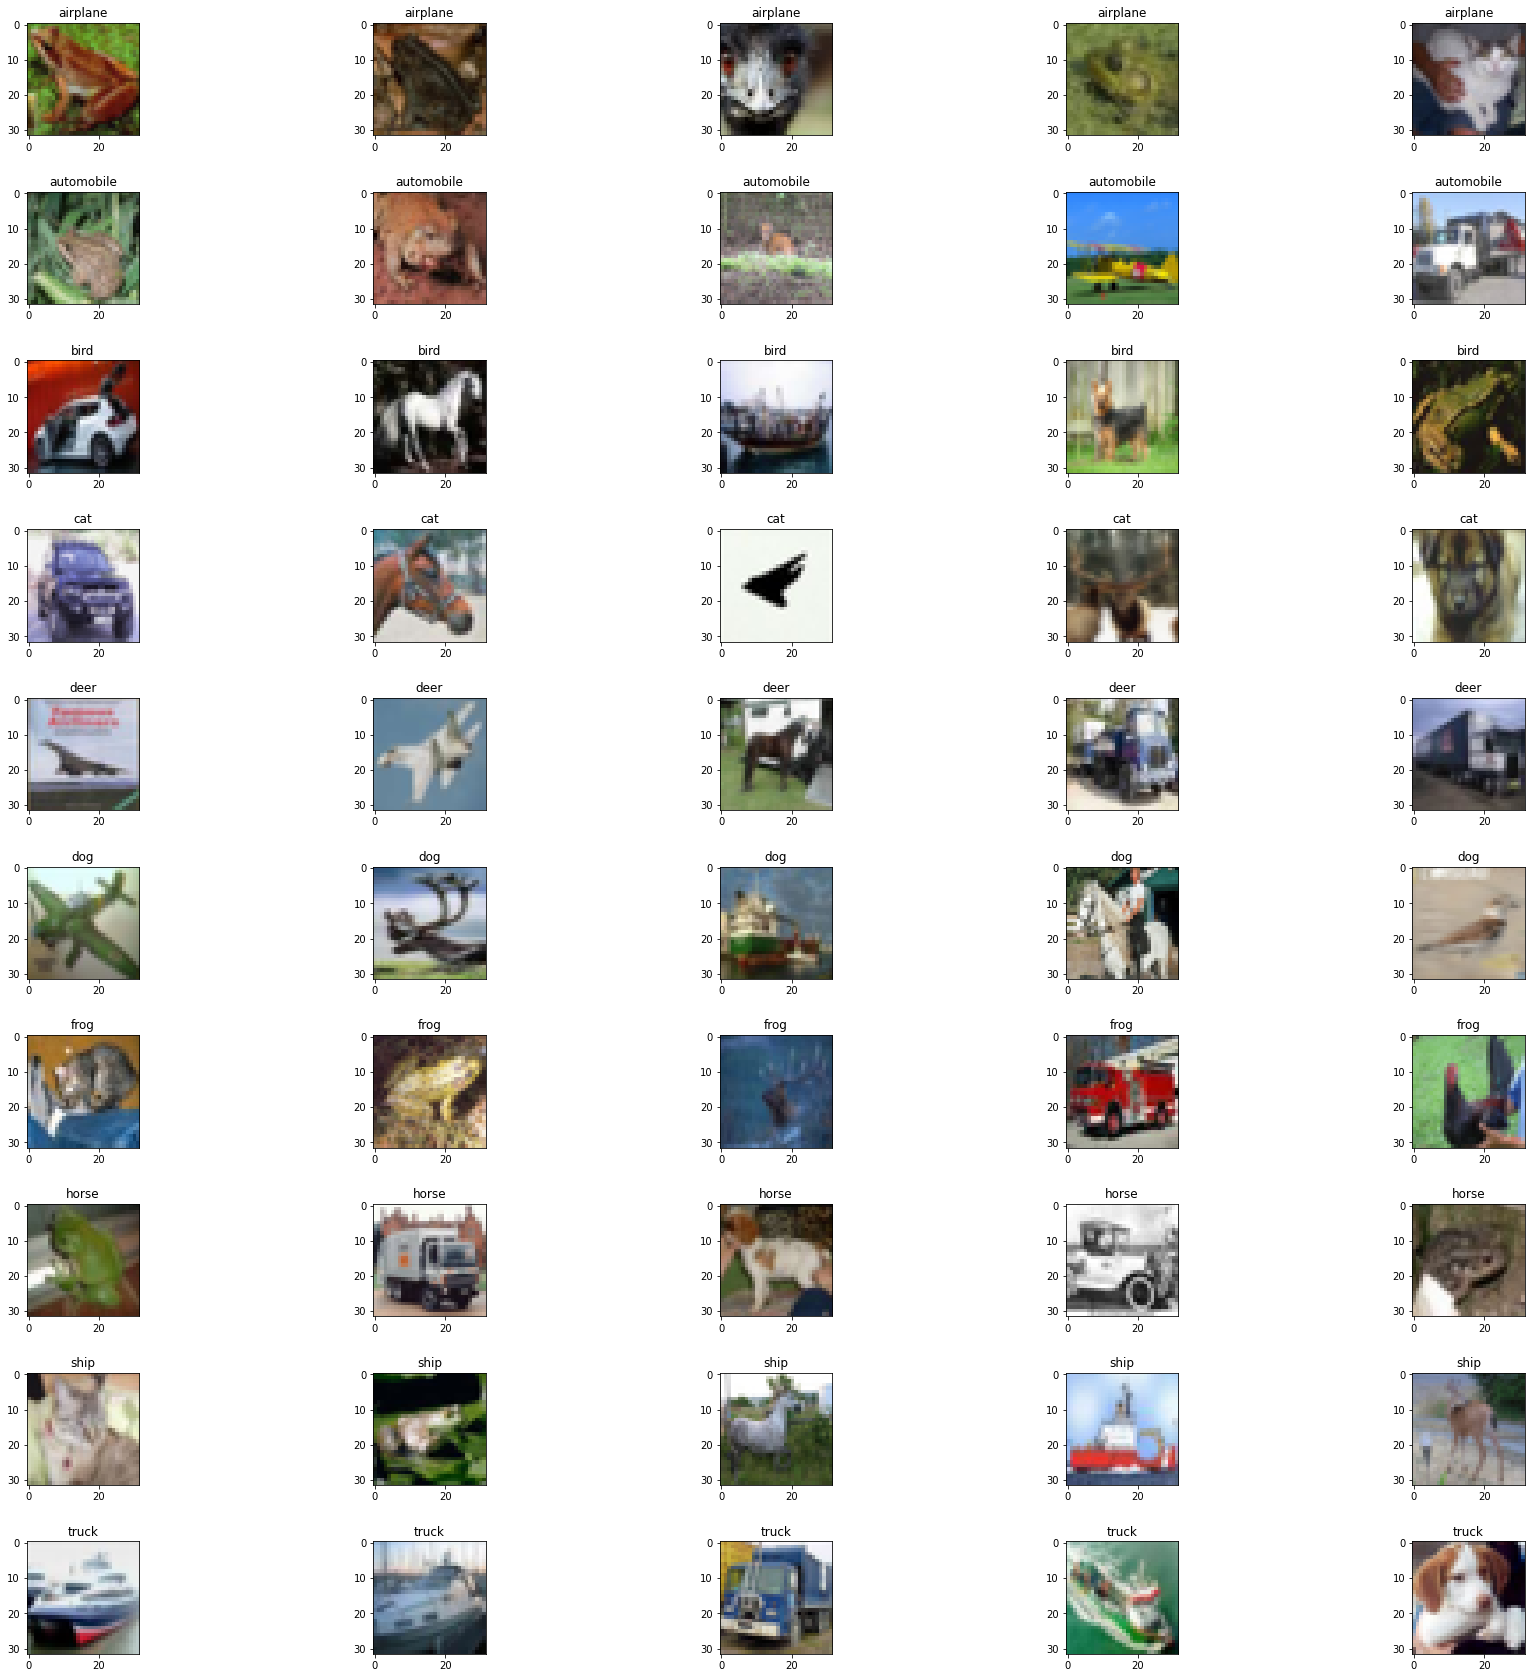


Overall accuracy = 0.3713

-------------

Class-wise accuracy for class-0 [airplane] : 0.463
Class-wise accuracy for class-1 [automobile] : 0.415
Class-wise accuracy for class-2 [bird] : 0.255
Class-wise accuracy for class-3 [cat] : 0.245
Class-wise accuracy for class-4 [deer] : 0.271
Class-wise accuracy for class-5 [dog] : 0.329
Class-wise accuracy for class-6 [frog] : 0.413
Class-wise accuracy for class-7 [horse] : 0.404
Class-wise accuracy for class-8 [ship] : 0.494
Class-wise accuracy for class-9 [truck] : 0.424


In [5]:
perform_q1()

---------------------------------------------------------------------------------------------------------------------------------------

Question - 2

In [7]:
#dataset reading code is used as taught in the tutorial
def read_image_data(file):
    with gzip.open(file, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        return images
def read_label_data(file):
    with gzip.open(file, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        label_count = int.from_bytes(f.read(4), 'big')
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

def perform_q2():

    train_x = read_image_data("./data/mnist/mnist/train-images-idx3-ubyte.gz")
    train_y = read_label_data("./data/mnist/mnist/train-labels-idx1-ubyte.gz")
    test_x = read_image_data("./data/mnist/mnist/t10k-images-idx3-ubyte.gz")
    test_y = read_label_data("./data/mnist/mnist/t10k-labels-idx1-ubyte.gz")

    train_x_reshaped = train_x.reshape((train_x.shape[0], train_x.shape[1]*train_x.shape[2]))
    test_x_reshaped = test_x.reshape((test_x.shape[0], test_x.shape[1]*test_x.shape[2]))

    train_x_reshaped = StandardScaler().fit_transform(train_x_reshaped)
    test_x_reshaped = StandardScaler().fit_transform(test_x_reshaped)

    n_comps = [15, 8, 3]

    accuracy_vals = {}
    for n_comp in n_comps:

        print(f"---------- n_components = {n_comp} ------------------\n")
        #transforming the dataset
        pca = PCA(n_components=n_comp)
        pca_transformed_train_x = pca.fit_transform(train_x_reshaped)
        pca_transformed_test_x = pca.transform(test_x_reshaped)
        print(f"Transformed train_x shape : {pca_transformed_train_x.shape}")
        print(f"Tranformed test_x shape : {pca_transformed_test_x.shape}")

        #applying LDA
        clf = LDA()
        clf.fit(pca_transformed_train_x, train_y)
        pickle.dump(clf, open(f'./models/q2_lda_n_comps_{n_comp}.sav', 'wb'))
        #prediction part
        y_preds = clf.predict(pca_transformed_test_x)
        accuracy = compute_accuracy(test_y, y_preds)
        accuracy_vals[n_comp] = accuracy
        print(f"Accuracy on test dataset = {accuracy}")
        print("\n----------------------------------------------------\n")

    acc_val = accuracy_vals.values()
    fig, ax = plt.subplots(figsize=(8, 8))
    bars = ax.bar(n_comps, acc_val, width=2)
    ax.set_xticks(n_comps)
    ax.bar_label(bars)
    ax.set_xlabel("n_components")
    ax.set_ylabel("Accuracy value")
    plt.title("Accuracy value vs n_components")
    plt.show()


---------- n_components = 15 ------------------

Transformed train_x shape : (60000, 15)
Tranformed test_x shape : (10000, 15)
Accuracy on test dataset = 0.7929

----------------------------------------------------

---------- n_components = 8 ------------------

Transformed train_x shape : (60000, 8)
Tranformed test_x shape : (10000, 8)
Accuracy on test dataset = 0.7269

----------------------------------------------------

---------- n_components = 3 ------------------

Transformed train_x shape : (60000, 3)
Tranformed test_x shape : (10000, 3)
Accuracy on test dataset = 0.4768

----------------------------------------------------



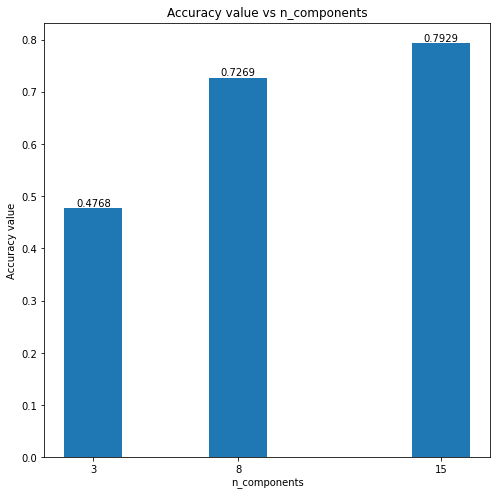

In [8]:
perform_q2()

-------------------------------------------------------------------------------------------------------------------------------------------------

Question - 3

In [9]:
def get_class_wise_data(train_x, train_y):
    class_wise_data = []
    
    for label in range(10):
        # print(label)
        label_idx = list(np.where(train_y == label)[0])
        # print(f"label_idx = {len(label_idx)}")
        class_x_data = train_x[label_idx].T
        # print(f"class_x = {class_x_data.shape}")
        class_wise_data.append(class_x_data)
    total_X_matrix = np.array(class_wise_data[0])
    # print(f"INITIAL : {total_X_matrix.shape}")
    for label in range(1, 10):
        # print(class_wise_data[label].shape)
        total_X_matrix = np.concatenate((total_X_matrix, class_wise_data[label]), axis=1)
        # print(f"AFTER : {total_X_matrix.shape}" )
        
    return class_wise_data, total_X_matrix

def get_class_wise_means(class_wise_x_train):
    class_wise_means = []
    for i in range(len(class_wise_x_train)):
        mean_x_i = np.mean(class_wise_x_train[i], axis=1)
        mean_x_i = mean_x_i.reshape(mean_x_i.shape[0], 1)
        class_wise_means.append(mean_x_i)
    return class_wise_means

def get_S_w(class_wise_x_train, class_wise_means):
    num_classes = len(class_wise_x_train)
    num_features = class_wise_means[0].shape[0]
    # print(f"Num classes = {num_classes} | Num_feats = {num_features}")
    S_mats = []
    S_w = np.zeros((num_features, num_features))
    for i in range(num_classes):
        S_i = np.dot((class_wise_x_train[i] - class_wise_means[i]), (class_wise_x_train[i] - class_wise_means[i]).T)
        # print(f"shape of S_i = {S_i.shape}")
        S_mats.append(S_i)
        S_w += S_i
    # print(f"Final shape S_w = {S_w.shape}")
    return S_w

def get_S_b(total_x_train, S_w):
    mean_X_total = np.mean(total_x_train, axis=1)
    mean_X_total = mean_X_total.reshape((mean_X_total.shape[0], 1))
    S_t = np.dot((total_x_train - mean_X_total), (total_x_train - mean_X_total).T)
    S_b = S_t - S_w
    return S_b

def sort_eigenvectors(eigenvectors, eigenvalues):
    eigenvectors_sorted_inc = eigenvectors[:, eigenvalues.argsort()]
    eigenvectors_sorted_dec = np.flip(eigenvectors_sorted_inc, axis=1)
    return eigenvectors_sorted_dec

def perform_FDA(train_x, train_y):
    class_wise_x_train, total_x_train = get_class_wise_data(train_x, train_y)
    class_wise_means = get_class_wise_means(class_wise_x_train)
    S_w = get_S_w(class_wise_x_train, class_wise_means)
    S_b = get_S_b(total_x_train, S_w)
    scat_prod = np.dot(np.linalg.inv(S_w), S_b)
    un, eigenvalues, eigenvectors = np.linalg.svd(scat_prod)
    W = sort_eigenvectors(eigenvectors, eigenvalues)[:, :9]
    return W

def project_data(X, W):
    return np.dot(W.T, X)

def perform_q3():
    train_data = pd.read_csv("./data/fmnist/fashion-mnist_train.csv")
    test_data = pd.read_csv("./data/fmnist/fashion-mnist_test.csv")

    train_x = np.array(train_data.iloc[:,1:])
    train_y = np.array(train_data.iloc[:, 0])
    test_x = np.array(test_data.iloc[:, 1:])
    test_y = np.array(test_data.iloc[:,0])
    labels_to_name = { 0:"T-shirt/top", 1 :"Trouser", 2 :"Pullover", 3 :"Dress", 4 :"Coat", 5 :"Sandal", 6 :"Shirt", 7 :"Sneaker", 8 :"Bag", 9 :"Ankle boot"}

    # train_x = StandardScaler().fit_transform(train_x)
    #  test_x = StandardScaler().fit_transform(test_x)

    W = perform_FDA(train_x, train_y)

    projected_X_train = project_data(train_x.T, W)
    projected_X_test = project_data(test_x.T, W)
    clf = LDA()
    clf.fit(projected_X_train.T, train_y)
    y_preds = clf.predict(projected_X_test.T)

    #Accuracy calculations
    overall_accuracy = compute_accuracy(test_y, y_preds)
    print(f"\nOverall accuracy = {overall_accuracy}\n\n-------------\n")    
    # #Class-wise-accuracy
    class_wise_accuracy = {}
    for lab in labels_to_name.keys():
        class_idxs = np.where(test_y == lab)[0]
        true_labs = test_y[class_idxs]
        pred_labs = y_preds[class_idxs]
        class_wise_accuracy[lab] = compute_accuracy(true_labs, pred_labs)
    for lab in class_wise_accuracy.keys():
        print(f"Class-wise accuracy for class-{lab} [{labels_to_name[lab]}] : {class_wise_accuracy[lab]}")


In [10]:
perform_q3()


Overall accuracy = 0.6088

-------------

Class-wise accuracy for class-0 [T-shirt/top] : 0.647
Class-wise accuracy for class-1 [Trouser] : 0.85
Class-wise accuracy for class-2 [Pullover] : 0.402
Class-wise accuracy for class-3 [Dress] : 0.647
Class-wise accuracy for class-4 [Coat] : 0.545
Class-wise accuracy for class-5 [Sandal] : 0.609
Class-wise accuracy for class-6 [Shirt] : 0.197
Class-wise accuracy for class-7 [Sneaker] : 0.749
Class-wise accuracy for class-8 [Bag] : 0.609
Class-wise accuracy for class-9 [Ankle boot] : 0.833


------------------------------------------------------------------------------------------------------------------------------------------------

Question - 4

In [13]:
#dataset reading code is used as taught in the tutorial
def read_image_data(file):
    with gzip.open(file, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        return images

def read_label_data(file):
    with gzip.open(file, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        label_count = int.from_bytes(f.read(4), 'big')
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

def get_class_wise_data(train_x, train_y):
    class_wise_data = []
    
    for label in range(10):
        # print(label)
        label_idx = list(np.where(train_y == label)[0])
        # print(f"label_idx = {len(label_idx)}")
        class_x_data = train_x[label_idx].T
        # print(f"class_x = {class_x_data.shape}")
        class_wise_data.append(class_x_data)
    total_X_matrix = np.array(class_wise_data[0])
    # print(f"INITIAL : {total_X_matrix.shape}")
    for label in range(1, 10):
        # print(class_wise_data[label].shape)
        total_X_matrix = np.concatenate((total_X_matrix, class_wise_data[label]), axis=1)
        # print(f"AFTER : {total_X_matrix.shape}" )
        
    return class_wise_data, total_X_matrix

def get_class_wise_means(class_wise_x_train):
    class_wise_means = []
    for i in range(len(class_wise_x_train)):
        mean_x_i = np.mean(class_wise_x_train[i], axis=1)
        mean_x_i = mean_x_i.reshape(mean_x_i.shape[0], 1)
        class_wise_means.append(mean_x_i)
    return class_wise_means

def get_S_w(class_wise_x_train, class_wise_means):
    num_classes = len(class_wise_x_train)
    num_features = class_wise_means[0].shape[0]
    # print(f"Num classes = {num_classes} | Num_feats = {num_features}")
    S_mats = []
    S_w = np.zeros((num_features, num_features))
    for i in range(num_classes):
        S_i = np.dot((class_wise_x_train[i] - class_wise_means[i]), (class_wise_x_train[i] - class_wise_means[i]).T)
        # print(f"shape of S_i = {S_i.shape}")
        S_mats.append(S_i)
        S_w += S_i
    # print(f"Final shape S_w = {S_w.shape}")
    return S_w

def get_S_b(total_x_train, S_w):
    mean_X_total = np.mean(total_x_train, axis=1)
    mean_X_total = mean_X_total.reshape((mean_X_total.shape[0], 1))
    S_t = np.dot((total_x_train - mean_X_total), (total_x_train - mean_X_total).T)
    S_b = S_t - S_w
    return S_b

def sort_eigenvectors(eigenvectors, eigenvalues):
    eigenvectors_sorted_inc = eigenvectors[:, eigenvalues.argsort()]
    eigenvectors_sorted_dec = np.flip(eigenvectors_sorted_inc, axis=1)
    return eigenvectors_sorted_dec

def perform_FDA(train_x, train_y):
    class_wise_x_train, total_x_train = get_class_wise_data(train_x, train_y)
    class_wise_means = get_class_wise_means(class_wise_x_train)
    S_w = get_S_w(class_wise_x_train, class_wise_means)
    S_b = get_S_b(total_x_train, S_w)
    scat_prod = np.dot(np.linalg.inv(S_w), S_b)
    un, eigenvalues, eigenvectors = np.linalg.svd(scat_prod)
    W = sort_eigenvectors(eigenvectors, eigenvalues)[:, :9]
    return W

def project_data(X, W):
    return np.dot(W.T, X)

def perform_q4():

    train_x = read_image_data("./data/mnist/mnist/train-images-idx3-ubyte.gz")
    train_y = read_label_data("./data/mnist/mnist/train-labels-idx1-ubyte.gz")
    test_x = read_image_data("./data/mnist/mnist/t10k-images-idx3-ubyte.gz")
    test_y = read_label_data("./data/mnist/mnist/t10k-labels-idx1-ubyte.gz")

    train_x_reshaped = train_x.reshape((train_x.shape[0], train_x.shape[1]*train_x.shape[2]))
    test_x_reshaped = test_x.reshape((test_x.shape[0], test_x.shape[1]*test_x.shape[2]))

    train_x_reshaped = StandardScaler().fit_transform(train_x_reshaped)
    test_x_reshaped = StandardScaler().fit_transform(test_x_reshaped)

    best_n_comp = 15
    pca = PCA(n_components=best_n_comp)
    pca_transformed_train_x = pca.fit_transform(train_x_reshaped)
    pca_transformed_test_x = pca.transform(test_x_reshaped)
    # print(f"Transformed train_x shape : {pca_transformed_train_x.shape}")
    # print(f"Tranformed test_x shape : {pca_transformed_test_x.shape}")

    W_fda = perform_FDA(pca_transformed_train_x, train_y)

    projected_X_train = project_data(pca_transformed_train_x.T, W_fda)
    projected_X_test = project_data(pca_transformed_test_x.T, W_fda)

    clf = LDA()
    clf.fit(projected_X_train.T, train_y)
    y_preds = clf.predict(projected_X_test.T)

    labels = [x for x in range(10)]
    overall_accuracy = compute_accuracy(test_y, y_preds)
    print(f"\nOverall accuracy = {overall_accuracy}\n\n-------------\n")
    # #Class-wise-accuracy
    class_wise_accuracy = {}
    for lab in labels:
        class_idxs = np.where(test_y == lab)[0]
        true_labs = test_y[class_idxs]
        pred_labs = y_preds[class_idxs]
        class_wise_accuracy[lab] = compute_accuracy(true_labs, pred_labs)
    for lab in class_wise_accuracy.keys():
        print(f"Class-wise accuracy for class-{lab} : {class_wise_accuracy[lab]}")

In [15]:
perform_q4()


Overall accuracy = 0.7262

-------------

Class-wise accuracy for class-0 : 0.7540816326530613
Class-wise accuracy for class-1 : 0.9515418502202643
Class-wise accuracy for class-2 : 0.5988372093023255
Class-wise accuracy for class-3 : 0.6782178217821783
Class-wise accuracy for class-4 : 0.7596741344195519
Class-wise accuracy for class-5 : 0.547085201793722
Class-wise accuracy for class-6 : 0.8079331941544885
Class-wise accuracy for class-7 : 0.7957198443579766
Class-wise accuracy for class-8 : 0.6447638603696099
Class-wise accuracy for class-9 : 0.6798810703666998


--------------------------------------------------------------------------------------------------------------------------------------------